In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


filename = 'Participants_Data/Data_Train.xlsx'
data_train = pd.read_excel(filename)
data_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [20]:
#To float Reviews y Ratings

data_train['Reviews'] = data_train.Reviews.apply(lambda e: float(e.split()[0]))
data_train['Ratings']= data_train.Ratings.str.extract('(\d+)')
data_train["Ratings"] = data_train.Ratings.astype(float)



In [21]:
#Unique values in Bookcategory, Genre, Author y Title 

len(data_train['BookCategory'].unique()), len(data_train['Genre'].unique()), len(data_train['Author'].unique()), len(data_train.Title.unique())

(11, 345, 3679, 5568)

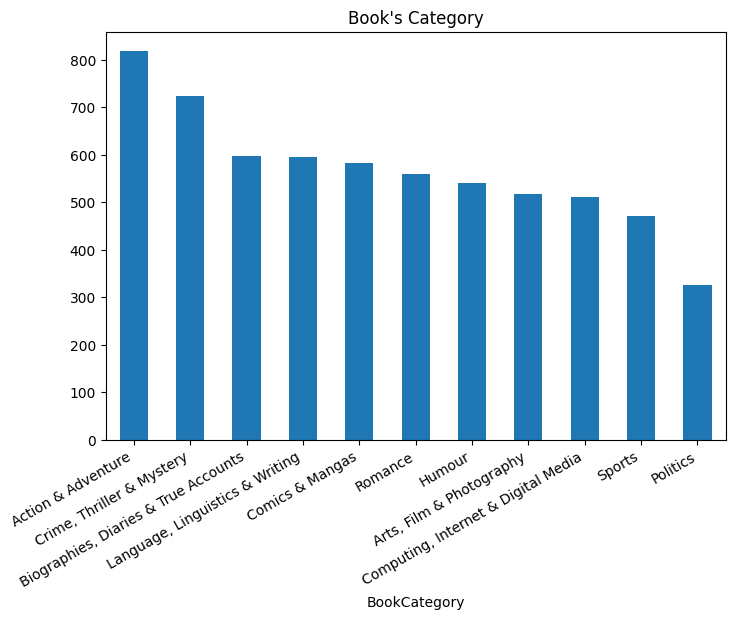

In [22]:
#Barplot Bookcategory Values

fig,ax= plt.subplots(figsize=(8,6))
data_train['BookCategory'].value_counts().plot(kind = 'bar')
plt.title("Book's Category")
fig.autofmt_xdate()

In [23]:
data_train['BookCategory'] = data_train.BookCategory.astype('category')
data_train['Author'] = data_train.Author.astype('category')
data_train['Genre'] = data_train.Genre.astype('category')
data_train['Title'] = data_train.Genre.astype('category')
data_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         6237 non-null   category
 1   Author        6237 non-null   category
 2   Edition       6237 non-null   object  
 3   Reviews       6237 non-null   float64 
 4   Ratings       6237 non-null   float64 
 5   Synopsis      6237 non-null   object  
 6   Genre         6237 non-null   category
 7   BookCategory  6237 non-null   category
 8   Price         6237 non-null   float64 
dtypes: category(4), float64(3), object(2)
memory usage: 466.1+ KB


In [24]:
data_train['Edition_Year'] = data_train['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else '0')
data_train["Edition_Year"] = data_train.Edition_Year.astype(int)

In [25]:
# drop columns Edition, Synopsis, Title

data_train = data_train.drop(['Edition', 'Synopsis'], axis=1)

In [26]:
data_train.head()

,Title,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year
0,Action & Adventure (Books),Chris Kuzneski,4.0,8.0,Action & Adventure (Books),Action & Adventure,220.00,2016
1,Cinema & Broadcast (Books),Arun Khopkar,3.9,14.0,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012
2,International Relations,Thomas Hobbes,4.8,6.0,International Relations,Humour,299.00,1982
3,Contemporary Fiction (Books),Agatha Christie,4.1,13.0,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017
4,Photography Textbooks,Editors of Life,5.0,1.0,Photography Textbooks,"Arts, Film & Photography",965.62,2006


In [27]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         6237 non-null   category
 1   Author        6237 non-null   category
 2   Reviews       6237 non-null   float64 
 3   Ratings       6237 non-null   float64 
 4   Genre         6237 non-null   category
 5   BookCategory  6237 non-null   category
 6   Price         6237 non-null   float64 
 7   Edition_Year  6237 non-null   int64   
dtypes: category(4), float64(3), int64(1)
memory usage: 417.4 KB


In [28]:
data_train['BookCategory'] = data_train.BookCategory.cat.codes
data_train['Author'] = data_train.Author.cat.codes
data_train['Genre'] = data_train.Genre.cat.codes
data_train['Title'] = data_train.Title.cat.codes
data_train.head()

,Title,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year
0,1,615,4.0,8.0,1,0,220.00,2016
1,74,307,3.9,14.0,74,2,202.93,2012
2,193,3390,4.8,6.0,193,6,299.00,1982
3,92,62,4.1,13.0,92,5,180.00,2017
4,253,953,5.0,1.0,253,1,965.62,2006


In [29]:
# correlation matrix
matrix_corr = data_train.corr()

matrix_corr

,Title,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year
Title,1.000000,0.008517,-0.000574,-0.014876,1.000000,0.413287,0.061064,-0.022408
Author,0.008517,1.000000,-0.015712,-0.009825,0.008517,-0.003658,-0.002670,-0.000647
Reviews,-0.000574,-0.015712,1.000000,-0.009644,-0.000574,-0.045656,0.108373,0.001852
Ratings,-0.014876,-0.009825,-0.009644,1.000000,-0.014876,-0.019665,-0.101145,-0.007209
Genre,1.000000,0.008517,-0.000574,-0.014876,1.000000,0.413287,0.061064,-0.022408
BookCategory,0.413287,-0.003658,-0.045656,-0.019665,0.413287,1.000000,-0.011616,0.023717
Price,0.061064,-0.002670,0.108373,-0.101145,0.061064,-0.011616,1.000000,-0.014336
Edition_Year,-0.022408,-0.000647,0.001852,-0.007209,-0.022408,0.023717,-0.014336,1.000000


In [30]:
matrix_corr.Price.sort_values()


Ratings        -0.101145
Edition_Year   -0.014336
BookCategory   -0.011616
Author         -0.002670
Title           0.061064
Genre           0.061064
Reviews         0.108373
Price           1.000000
Name: Price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

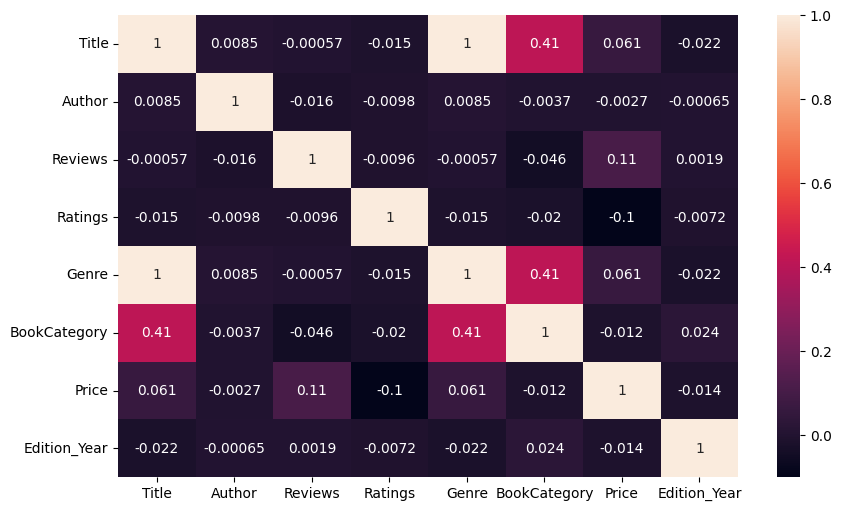

In [31]:
# heatmap

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(matrix_corr, annot=True)
plt.show


In [32]:
from scipy.stats import boxcox
#y=boxcox(data_train.Price)[0]
#y = data_train['Price'].values
#X = data_train.drop(['Price'],axis=1).values

In [33]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

#X_scaler = scaler.fit_transform(X)

In [34]:
data_train_scaler = scaler.fit_transform(data_train)

In [35]:
y=boxcox(data_train.Price)[0]
X = data_train.drop(['Price'],axis=1).values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [39]:
model.feature_importances_, 


(array([0.11170901, 0.17960956, 0.13846753, 0.1697478 , 0.11187232,
        0.13626449, 0.15232929]),)

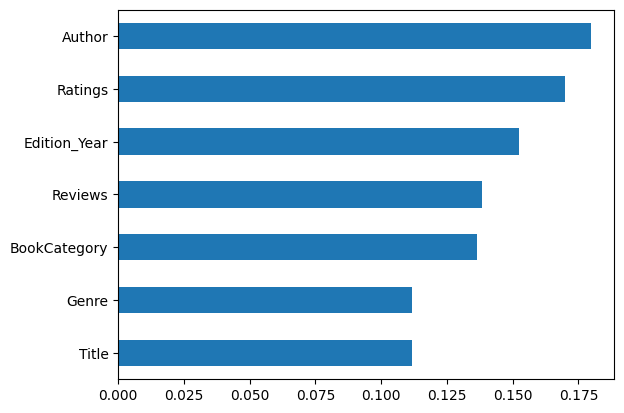

In [40]:
#Features Importances
feat_importance = pd.Series(model.feature_importances_,index=data_train.drop(['Price'], axis=1).columns)
figure = feat_importance.sort_values(ascending=True).plot(kind='barh')
plt.show()


In [41]:
# Training the model
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12) ]
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2, 5, 10 ,15,100]
min_samples_leaf = [1,2,5,10]


In [42]:
ramdom_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' :min_samples_split,
               'min_samples_leaf' : min_samples_leaf  
}

ramdom_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [43]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

In [44]:
rmd_model = RandomizedSearchCV(estimator=rf_model, param_distributions=ramdom_grid,n_iter=5, cv=5 )
rmd_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

In [45]:
rmd_model.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [46]:
# model performance
rmd_predictions = rmd_model.predict(X_test)
print("Test Score:", rmd_model.score(X_test, y_test), "Train Score:" ,rmd_model.score(X_train, y_train))

Test Score: 0.3254758942937035 Train Score: 0.9089159688382743


In [47]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("MAE: ", mae(y_true= y_test, y_pred= rmd_predictions),"MSE: ", mse(y_true= y_test, y_pred= rmd_predictions))

MAE:  0.20653263904511193 MSE:  0.07567222015268879


Text(0, 0.5, 'True Values')

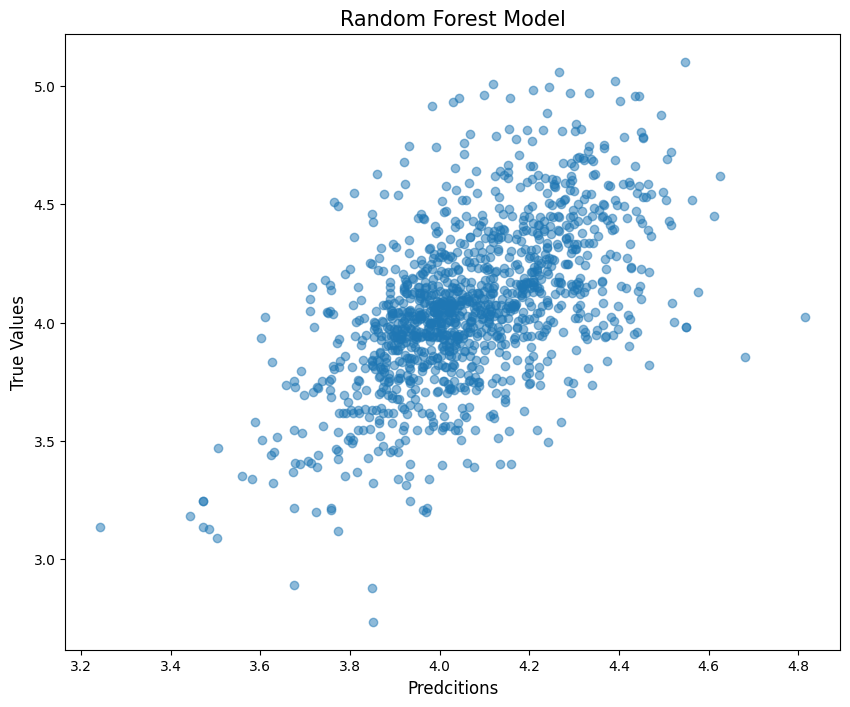

In [48]:

plt.figure(figsize=(10,8))
plt.scatter(rmd_predictions, y_test, alpha= 0.5)
plt.title('Random Forest Model', fontsize = 15
          )
plt.xlabel('Predcitions', fontsize= 12)
plt.ylabel('True Values', fontsize= 12)


/tmp/ipykernel_4835/1351637415.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - rmd_predictions)


<Axes: ylabel='Density'>

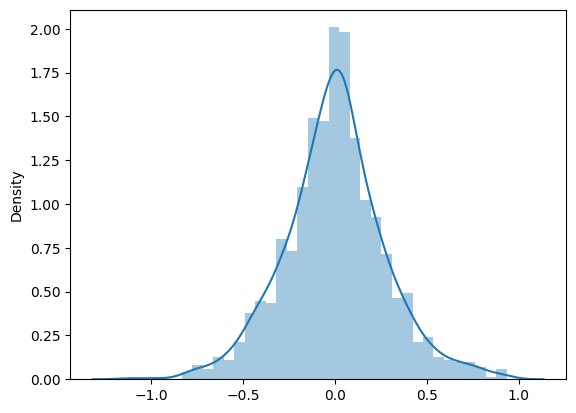

In [49]:
sns.distplot(y_test - rmd_predictions)

In [50]:
#import pickle
# file = open('random_forest_regressor_model.pkl', 'wb')
# pickle.dump(final_rf_model, file)